**Grocery and Corperations**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import re

import importlib
import EDA_functions as EDA_functions
importlib.reload(EDA_functions)
from EDA_functions import *

scaler_ss = StandardScaler()
scaler_mm = MinMaxScaler()

clean_path = '../../data/processed_data/'
raw_path = '../../data/raw_data/'

GDP filtered for Farm product wholesaler-distributors, Food, beverage and tobacco wholesaler-distributors, Food and beverage stores , and Food services and drinking places 

Stats Canada

In [12]:
gdp_corperate = pd.read_csv(raw_path+'retail_gdp.csv', header=0, index_col=0, skiprows=11, skipfooter=20, on_bad_lines='skip', engine='python', na_values='..', thousands=',')
gdp_corperate.index = gdp_corperate.index.rename('Date')
gdp_corperate.drop(gdp_corperate.index[0:2], inplace=True)

gdp_corperate.columns = [remove_reg(col) for col in gdp_corperate.columns]

gdp_corperate.index = pd.to_datetime(gdp_corperate.index, format='%B %Y')
gdp_corperate = gdp_corperate.apply(pd.to_numeric)

col_names_gdp_corperate = list(gdp_corperate.columns)

gdp_corperate_s = ss_scale_a_df(gdp_corperate, 'MS')

gdp_corperate.head()

,Farm product wholesaler-distributors,"Food, beverage and tobacco wholesaler-distributors",Food and beverage stores,Food services and drinking places
Date,,,,
1997-01-01,NaN,NaN,NaN,19829.0
1997-02-01,NaN,NaN,NaN,20494.0
1997-03-01,NaN,NaN,NaN,20461.0
1997-04-01,NaN,NaN,NaN,20504.0
1997-05-01,NaN,NaN,NaN,20549.0


In [13]:
gdp_farm_whole = pd.DataFrame(gdp_corperate.iloc[120:,0])
gdp_food_whole = pd.DataFrame(gdp_corperate.iloc[120:,1])
gdp_food_store = pd.DataFrame(gdp_corperate.iloc[120:,2])
gdp_food_service = pd.DataFrame(gdp_corperate.iloc[:,3])

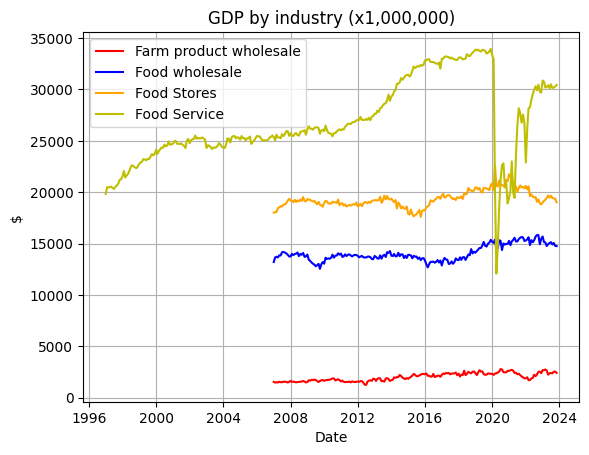

In [14]:
plot_targets([gdp_farm_whole, gdp_food_whole, gdp_food_store, gdp_food_service],
             4,
             ['Farm product wholesale', 'Food wholesale', 'Food Stores', 'Food Service'],
             ['r', 'b', 'orange', 'y'],
             'GDP by industry (x1,000,000)',
             'Date',
             '$',
             'True',
             'True')

Work Stoppages
StatCan

In [15]:
work_stop = pd.read_csv(raw_path+'work_stoppages.csv', header=[0,1], index_col=0, skiprows=[0,1,2,3,4,5,6,7,8,10], skipfooter=20, on_bad_lines='skip', engine='python', na_values='..', thousands=',')
work_stop.index = work_stop.index.rename('Date')
work_stop.drop(work_stop.index[0:1], inplace=True)

work_stop.columns = pd.MultiIndex.from_tuples(
    [(col[0], col[1]) if 'Unnamed' not in col[0] else ('', col[1]) for col in work_stop.columns],
    names=['Industry', 'Variable']
)

work_stop.columns= tuple(re.sub(r'\d+', '', element) if isinstance(element, str) else element for element in work_stop.columns)

work_stop.index = pd.to_datetime(work_stop.index, format='%B %Y')
work_stop = work_stop.apply(pd.to_numeric)

work_stop

All industries  ...                       
           Number of work stoppages  ... Person-days not worked
Date                                 ...                       
1986-01-01                      128  ...                 1020.0
1986-02-01                      146  ...                 1520.0
1986-03-01                      144  ...                 5230.0
1986-04-01                      157  ...                 2930.0
1986-05-01                      180  ...                12030.0
...                             ...  ...                    ...
2023-11-01                      644  ...                 7630.0
2023-12-01                      607  ...                 7010.0
2024-01-01                      609  ...                 6360.0
2024-02-01                      612  ...                 6060.0
2024-03-01                       85  ...                 8284.0

[459 rows x 20 columns]

/var/folders/1t/l8b_lf1j6w7fd6mwg7pf8xnw0000gn/T/ipykernel_80679/4228540500.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  plot_targets(dfs=[work_stop.loc[:, ('Wholesale and retail trade 5', 'Number of work stoppages')]],


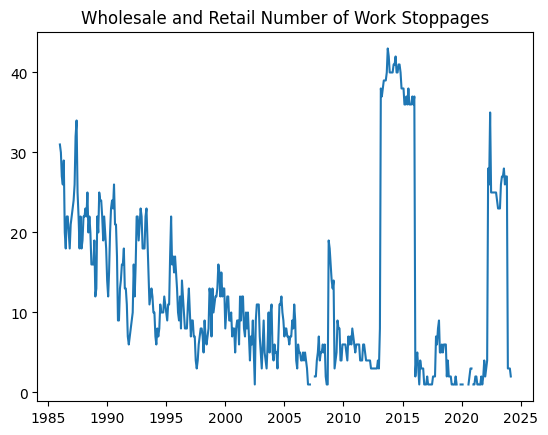

In [16]:
#plotting just the number of work stoppages for each industry

plot_targets(dfs=[work_stop.loc[:, ('Wholesale and retail trade 5', 'Number of work stoppages')]],
             title='Wholesale and Retail Number of Work Stoppages',)

/var/folders/1t/l8b_lf1j6w7fd6mwg7pf8xnw0000gn/T/ipykernel_80679/316800881.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  plot_targets(dfs=[work_stop.loc[:, ('Transportation 6', 'Number of work stoppages')]],


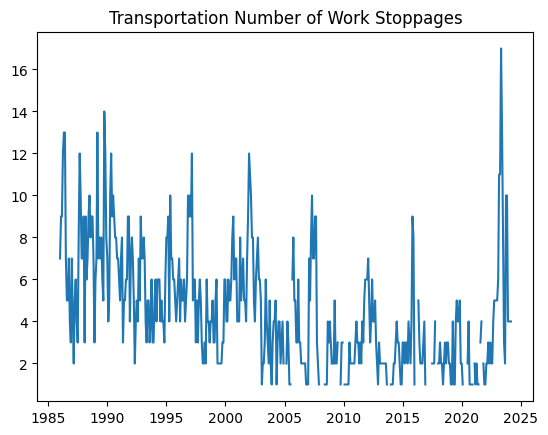

In [17]:
plot_targets(dfs=[work_stop.loc[:, ('Transportation 6', 'Number of work stoppages')]],
             title='Transportation Number of Work Stoppages',)

*Saving Cleaned CSVs*

In [18]:
"""gdp_corperate.to_csv(clean_path+'gdp_corperate_clean.csv')
gdp_farm_whole.to_csv(clean_path+'gdp_farm_whole_clean.csv')
gdp_food_whole.to_csv(clean_path+'gdp_food_whole_clean.csv')
gdp_food_store.to_csv(clean_path+'gdp_food_store_clean.csv')
gdp_food_service.to_csv(clean_path+'gdp_food_service_clean.csv')
work_stop.to_csv(clean_path+'work_stop_clean.csv')"""
